# Portfolio Project: Life Expectancy and GDP
Code and analysis by Adam Laviguer \<adamlaviguer@gmail.com\>

## Project Goals
1. Demonstrate ability to scope, execute, and document a data exploration and analysis project.
2. Demonstrate knowledge of Python for data visualization and analysis.
    - Seaborn and Matplotlib
    - Preprocess, explore, and analyze data
3. Exercise analytical thought process.

## Prompt
For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

During this project, you will analyze, prepare, and plot data in order to answer questions in a meaningful way.

After you perform your analysis, you’ll be creating a blog post to share your findings on the World Health Organization website.

## Project Data

In [18]:
# Import common libraries. All or some of these may be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import iqr, ttest_ind, pearsonr, trim_mean, chi2_contingency, ttest_1samp, binomtest

# Read the data file into a pandas DataFrame.
df = pd.read_csv('./codecademy-portfolio-project-life-expectancy-gdp/all_data.csv')
# Display the first 5 rows of the DataFrame.
print('\n=================== FIRST FIVE ROWS ===================\n{}\n'.format(df.head()))
print('\n=================== DF INFO ===================')
df.info()
print('\n\n=================== DF DESCRIBE ===================\n{}\n'.format(df.describe()))


=================== FIRST FIVE ROWS ===================
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


=================== DF INFO ===================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1),

## Data Analysis

### Explore and Validate Data

Given the summary statistics shown above, we know there are `96` total records in this dataset. The dataset is made up of 4 variables named `Country`, `Year`, `Life expectancy at birth (years)`, and `GDP`.

A precursory examination of the `Country` variable reveals that there are `6` unique countries represented in the dataset with `16` records for each country. The countries included are: `Chile`, `China`, `Germany`, `Mexico`, `United States of America`, and `Zimbabwe`.

In [29]:
print('Number of unique countries represented: {}\n'.format(df['Country'].nunique()))
print(df['Country'].value_counts())


Number of unique countries represented: 6

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64


To begin the analysis, let's look at the trend of life expectancy over time by country.

We can see by the plots below that between the years `2000` and `2015`, there is definitely an upward trend of life expectancy in all countries represented.

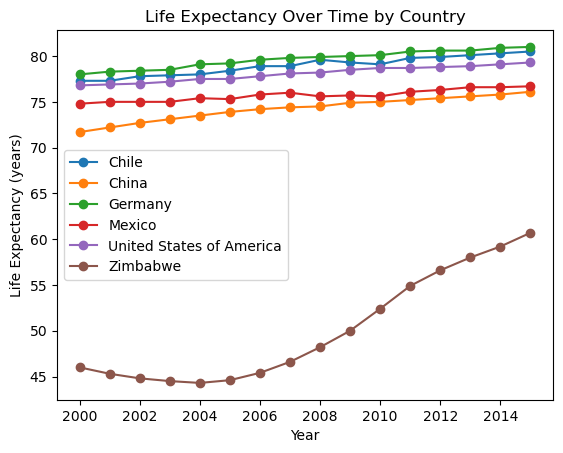

<Figure size 640x480 with 0 Axes>

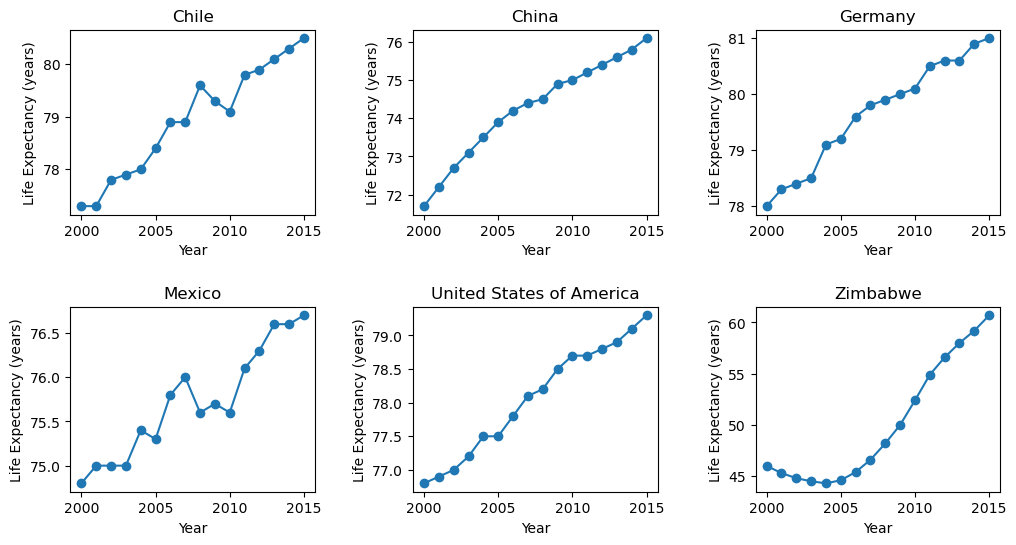

<Figure size 640x480 with 0 Axes>

In [42]:
# Plot the life expectancy over time for each country.
for country in df['Country'].unique():
    country_df = df[df['Country'] == country]
    plt.plot(country_df['Year'], country_df['Life expectancy at birth (years)'], marker='o', label=country)
plt.title('Life Expectancy Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend()
plt.show()
plt.clf()

plt.figure(figsize=(12,6))
for country in df['Country'].unique():
    country_df = df[df['Country'] == country]
    plt.subplot(2,3, list(df['Country'].unique()).index(country)+1)
    plt.plot(country_df['Year'], country_df['Life expectancy at birth (years)'], marker='o', label=country)
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy (years)')
plt.subplots_adjust(hspace=.5, wspace=.4)
plt.show()
plt.clf()
